# Logistic Regression

In Lesson 2 and Lesson 3, we learned how to solve regression with Linear Regression.

In this lesson, we will learn how to solve binary classification with Logistic Regression. For some stupid reason, Logistic Regression has the word "Regression" in its name even though it solves classification.

**Exercise 1: Read pages 16-19 in http://cs229.stanford.edu/notes/cs229-notes1.pdf**

Now that you have read the pages above, let's do the following:

1. Implement the logistic regression function
2. Implement the gradient of the logistic regression function
3. Implement the gradient descent step.

**Exercise 2 (logistic regression function): Implement a function that computes**

$$
h(\theta, \mathbf{x}) = \frac{1}{1 + e^{-\mathbf{\theta}^T\mathbf{x}}}
$$


In [8]:
import numpy as np

def log_reg(theta, X):
    """
    @param theta - parameter vector theta of size d x 1
    @param X - design matrix of size m x d (m is number of examples, d is dimensionality of feature vector)
    @return a vector of size m x 1 which the i^th element is the logistic regression value (as shown in the
        cell above) for the i^th example.
    """
    return np.array(1.0 / (1 + np.exp(-1 * (np.matmul(X, theta)))))
    

X = np.array([
    [1, 2, 3],
    [3, 4, 5],
])
theta = np.array([1, 2, -1]).reshape(3, 1)
print(log_reg(theta, X))
expected = np.array([0.88079708,  0.99752738]).reshape(2, 1)
actual = log_reg(theta, X)
almost_equal = lambda x, y: abs(x - y) < 0.0001
try:
    assert(actual.shape == expected.shape)
    assert(len([i for i in range(actual.shape[0]) if not almost_equal(actual[i], expected[i])]) == 0)
    print("Your implementation looks good")
except:
    print("Your implementation has a bug")

[[0.88079708]
 [0.99752738]]
Your implementation looks good


**Exercise 3 (gradient): Implement a function that computes the gradient with respect to $\theta$ for a given $\theta_{n}$, $\mathbf{x}$, and $y$**


$$
\nabla_{\mathbf{\theta}} \ell(\theta_n, \mathbf{x}, y) = (h(\theta_n, \mathbf{x}) - y)\mathbf{x}
$$

In [9]:
"""
Exercise 3: Implement gradient of logistic regression function.
"""

def gradient(theta, X, y):
    """
    @param theta - parameter vector theta of size d x 1
    @param X - design matrix of size m x d (m is number of examples, d is dimensionality of feature vector)
    @param y - label vector of size m x 1 indicating the binary label associated with each training example
    @return a vector of size m x d where the i^th row is the gradient vector (as shown in the cell above) for the i^th
        example.
    
    Hint: To element-wise multiply two matrices of the same size, do np.multiply(A, B).
    """
    return np.multiply(log_reg(theta, X) - y, X)


X = np.array([
    [1, 2, 3],
    [3, 4, 5],
])
theta = np.array([1, 2, -1]).reshape(3, 1)
y = np.array([1, 0]).reshape(2, 1)


actual = gradient(theta, X, y)
expected = np.array([
    [-0.11920292,  -0.23840584,  -0.35760877],
    [2.99258213, 3.99010951, 4.98763688],
])
try:
    assert(actual.shape == expected.shape)
    for i in range(actual.shape[0]):
        for j in range(actual.shape[1]):
            assert(almost_equal(actual[i][j], expected[i][j]))
    print('Your implementation looks good')
except:
    print('There is a bug in your implementation')

Your implementation looks good


**Exercise 4 (gradient descent): Implement a function that computes**


$$
\theta_{n+1} = \theta_{n} - \alpha \sum_{i=1}^{m}{\nabla_{\mathbf{\theta}_{n}} \ell(\theta_n, \mathbf{x}^{(i)}, y^{(i)})}
$$

In [10]:
def gradient_descent(theta, X, y, alpha):
    """
    @param theta - parameter vector theta of size d x 1
    @param X - design matrix of size m x d (m is number of examples, d is dimensionality of feature vector)
    @param y - label vector of size m x 1 indicating the binary label associated with each training example
    @param alpha - the learning rate parameter.
    @return a vector of size d x 1 representing the new theta after doing the gradient descent step (as shown
        above)
    """
    gr = gradient(theta, X, y)
    thetadiff = np.sum(gr, axis=0)
    ret= theta - (alpha * thetadiff).reshape(len(theta),1)
    return ret

X = np.array([
    [1, 2, 3],
    [3, 4, 5],
])
theta = np.array([1, 2, -1]).reshape(3, 1)
y = np.array([1, 0]).reshape(2, 1)
alpha = 0.01

expected = np.array([
    [ 0.97126621],
    [ 1.96248296],
    [-1.04630028],
])
actual = gradient_descent(theta, X, y, alpha)
try:
    assert(expected.shape == actual.shape)
    for i in range(expected.shape[0]):
        assert(almost_equal(actual[i], expected[i]))
except:
    print('Implementation has a bug')

## Final Algorithm

Now that we have implemented all the pieces above, it's easy to combine them together.

In [11]:
def fit_logistic_regression(
    X,
    y, 
    alpha=0.01,
    sigma=0.1,
    num_epochs=1000,
):
    """
    @param X - design matrix of size m x d (m is number of examples, d is dimensionality of feature vector)
    @param y - label vector of size m x 1 indicating the binary label associated with each training example
    @param alpha - the learning rate parameter.
    @param sigma - We initialize the theta vector with zero-mean Gaussian with the given value of sigma.
    @param num_epochs - The number of gradient descent steps we will take.
    
    @return The theta vector representing the parameters of the logistic regression.
    """
    (m, d) = X.shape
    y = y.reshape((m, 1))
    
    # Let's initialize the theta vector by randomly sampling
    # from a zero-mean Gaussian with standard deviation sigma.
    theta = np.random.normal(0, sigma, d).reshape((d, 1))
    
    # Run gradient descent.
    for i in range(num_epochs):
        theta = gradient_descent(theta, X, y, alpha)
    
    return theta

## Running Logistic Regression on a Simple Dataset

Now let's try out that logistic regression fitting function.

Let us generate a simple dataset with 10,000 examples where each example is a 4-element feature vector.

Each element of the feature vector is randomly sampled from a zero-mean unit-variance Gaussian.

We will compute the label for a feature vector as follows:

1. Sum the elements of the feature vector
2. Add some random noise from a zero-mean, unit-variance Gaussian
3. If the resulting value is positive, give it label = 1. Otherwise, give it label = 0

In [12]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

(m, d) = (10000, 4)
X = np.random.normal(0, 1, (m, d))
y = np.where((np.random.normal(0, 1, m) + np.sum(X, axis=1)) > 0, 1, 0)

# Split it into a train and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Logistic Regression and make predictions.
theta = fit_logistic_regression(X_train, y_train)
y_pred_scores = log_reg(theta, X_test)

# Reshape the predictions and labels for the test set.
m_test = y_test.shape[0]
y_test = y_test.reshape(m_test)
y_pred_scores = y_pred_scores.reshape(m_test)

print('True labels', y_test)
print('Predicted scores', y_pred_scores)

True labels [0 0 0 ... 1 0 0]
Predicted scores [1.33875823e-08 1.98254073e-09 1.82875842e-14 ... 1.00000000e+00
 1.78252666e-05 2.75116228e-03]


## Evaluating Binary Classification

Now that we have our scores and predictions, how do we evaluate the performance of our logistic
regression model?

One challenge is that our Logistic Regression model does not actually predict 0-1 labels, it predicts
a score between 0-1. Thus, we need to threshold the scores. That is, we need to pick a threshold
$t$ such that if the score exceeds $t$, we predict 1, otherwise we predict 0. That is, we have a thresholding function:

$$
T(v) = \mathbb{I}(v > t)
$$

Where $\mathbb{I}(x) = 1$ if $x$ is true and 0 otherwise.

Suppose that we are given the value of $t$, this allows us create two $m_{test}$-dimensional binary vectors. One vector contains the true labels for the test set (call it $\mathbf{y}$) and the other contains our predicted labels (call it $\mathbf{\hat{y}}$).

### (Bad Idea) Accuracy
One approach is to simply compute the fraction of times that our prediction matches the true label. That is:

$$
Accuracy = \frac{1}{m_{test}} \sum_{i=1}^{m_{test}}{\mathbb{I}(\mathbf{y}_i = \mathbf{\hat{y}}_i)}
$$

Why is this a bad idea? To understand, imagine that we have built a Logistic Regression classifier to predict whether a person has some rare disease (1 = they have the disease, 0 = they do NOT have the disease). In this case, almost ALL of our training examples will be labeled 0 (because the disease is rare). Thus, a very stupid classifier that ALWAYS predicts 0 will achieve an incredibly high accuracy.

### (Better Idea) Precision and Recall
To get around this problem, we denote four situations:

1. True Positive: We predict 1 and the label is 1
2. True Negative: We predict 0 and the label is 0
3. False Positive: We predict 1 and the label is 0
4. False Negative: We predict 0 and the label is 1

Denote the number of true positive, true negatives, false positives, and false negatives in our testing set with $TP$, $TN$, $FP$, and $FN$, respectively.

We then define the following two numbers:

$$
Precision = \frac{TP}{TP + FP}
$$

$$
Recall = \frac{TP}{TP + FN}
$$

Thus, going back to our "predicting rare disease" example, we have:

Precision = When the person has the disease, what's the probability that our classifier will indicate so?

Recall = What fraction of people with the disease is our classifier able to detect?



Suppose that the fraction of people who have the disease is $p$.

**Exercise 5: What is the Precision and Recall of a classifier that always predicts that people have the disease?**

$$
Precision = \frac{p}{p + (1-p)} = p \\
Recall = \frac{p}{p + 0} = 1
$$

**Exercise 6: What is the Precision and Recall of a classifier that never predicts that people have the disease?**

$$
Precision = \frac{0}{0 + 0} = undefined \\
Recall = \frac{0}{0 + p} = 0
$$

**Exercise 7: What is the Precision and Recall of the perfect classifier?**

$$
Precision = \frac{p}{p + 0)} = 1 \\
Recall = \frac{p}{p + 0} = 1
$$

**Exercise 8: What is the Precision and Recall of a classifier that flips a fair coin and predicts 1 if heads and 0 if tails?**

$$
Precision = \frac{.5p}{.5p + .5p)} = 0.5 \\
Recall = \frac{.5p}{.5p + .5(1-p)} = p
$$

**Exercise 9: What is the Precision and Recall of a classifier that randomly samples a number from the uniform distribution over the interval [0, 1] and predicts 1 if the sample is $\leq p$ and 0 otherwise?**

$$
Precision = \frac{p * p}{p * p + p * p)} = 0.5 \\
Recall = \frac{p * p}{p * p + (1-p)(1-p)} = \frac{p^2}{1 - 2p + 2p^2}
$$

### (Best Idea) F1 Score
Precision and Recall are nice, but it would be nice to summarize the performance of the model using just a single number. For this purpose, we have a metric called the F1 score:

$$
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
$$

### How do we pick the threshold $t$?
We know $t \in [0, 1]$, so try a thousand different values of $t$ between 0 and 1 and pick the one with the highest F1 score.

**Exercise 10: Implement Precision, Recall, and F1**

In [13]:
def precision_recall_f1(y_test, y_pred_labels):
    """
    @param y_test - An array of m true binary labels.
    @param y_pred_labels - An array of m predicted binary labels.
    
    @return A tuple of the form (f1, precision, recall)
    
    Hint: To count the number of examples where the prediction and
        the label are both 0, you can do:
        num_match = np.sum(np.where((y_test == 0) & (y_pred_labels == 0), 1, 0))
    """
    def compute_f1(precision, recall):
        return (2 * precision * recall / (precision + recall), precision, recall)
    n = len(y_test)
    assert(len(y_pred_labels) == n)
    def num_matches(predicted, actual):
        return np.sum(np.where((y_test == actual) & (y_pred_labels == predicted), 1, 0))
    TP, FP, TN, FN = (num_matches(predicted=1, actual=1), num_matches(predicted=1, actual=0), 
                      num_matches(predicted=0, actual=0), num_matches(predicted=0, actual=1))
    precision = (TP / (TP + FP))
    recall = (TP / (TP + FN))
    return compute_f1(precision, recall)

    
y_test_experiment = np.array(
    [1, 0, 1, 0, 0],
)
y_pred_labels_experiment = np.array(
    [1, 0, 0, 1, 1],
)
expected = (0.4, 1.0/3, 0.5)
actual = precision_recall_f1(y_test_experiment, y_pred_labels_experiment)
try:
    assert(expected == actual)
    print("Implementation looks good")
except:
    print("Implementation has a bug")

Implementation looks good


**Exercise 11: Implement logic for picking the best threshold**

In [14]:
def pick_best_threshold(y_test, y_pred_scores, thresholds):
    """
    @param y_test - An array of m true binary labels.
    @param y_pred_labels - An array of m predicted scores on the interval [0, 1].
    @param thresholds - An array of thresholds on the interval [0, 1] to try out.
    
    @return A dictionary with two keys: 'best_threshold' and 'precision_recall_f1s' where
        'best_threshold' maps to the threshold that maximizes f1 and 'precision_recall_f1s'
        is an array of (threshold, (f1, precision, recall)) tuples with one entry for each threshold
        and sorted by increasing threshold.
    """
    threshold_f1s = tuple(sorted({(i, precision_recall_f1(y_test, np.where(y_pred_scores > i, True, False))) for i in thresholds}, key=lambda t: t[0]))
    best = sorted(threshold_f1s, key=lambda t:t[1][0],reverse=True)[0][0]
    return {"best_threshold": best, "precision_recall_f1s": threshold_f1s}
            

y_test_experiment = np.array(
    [1, 0, 1, 0, 0, 1],
)
y_pred_scores_experiment = np.array(
    [0.8, 0.3, 0.1, 0.5, 0.7, 0.7],
)
expected = (0.4, 1.0/3, 0.5)
result = pick_best_threshold(y_test_experiment, y_pred_scores_experiment, [0.25, 0.5, 0.75])
try:
    assert(result['best_threshold'] == 0.5)
    assert(
        tuple(result['precision_recall_f1s']) == (
            (0.25, (0.5, 0.4, 2.0/3)), 
            (0.5, (2.0/3, 2.0/3, 2.0/3)), 
            (0.75, (0.5, 1.0, 1.0/3))
        )
    )
    print("Implementation looks good")
except:
    print("Implementation has a bug")

Implementation looks good


## Evaluating Logistic Regression

Let's now evaluate your logistic regression implementation.

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars


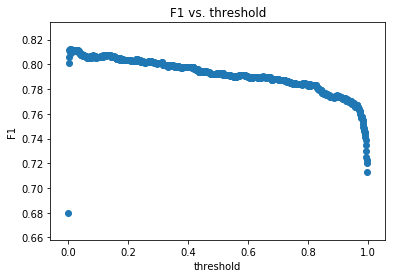

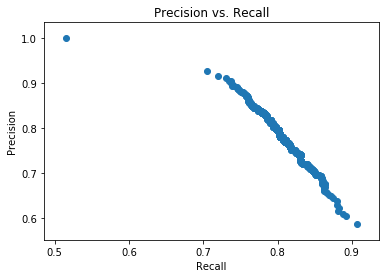

Best threshold is 0.005
It achieves f1 = 0.8122004357298476, precision = 0.7367588932806324, recall = 0.9048543689320389


In [15]:
import matplotlib.pyplot as plt
thresholds = np.linspace(0, 1, 1001)
result = pick_best_threshold(y_test, y_pred_scores, thresholds)

f1s = [p[1][0] for p in result['precision_recall_f1s']]
 
plt.scatter(thresholds, f1s)
plt.title('F1 vs. threshold')
plt.xlabel('threshold')
plt.ylabel('F1')
plt.show()

precision, recall = zip(*[(p[1][1], p[1][2]) for p in result['precision_recall_f1s']])

plt.scatter(precision, recall)
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

best_threshold = result['best_threshold']
print('Best threshold is {}'.format(best_threshold))
print(
    'It achieves f1 = {}, precision = {}, recall = {}'.format(
        *[p[1] for p in result['precision_recall_f1s'] if p[0] == best_threshold][0],
    )
)